In [ ]:
# prompt: /content/Bus metro_transport data.csv
# /content/commercial,Retail.csv
# /content/cpz_station_timeseries_2021_yearly_15min.parquet
# /content/cpz_station_timeseries_2022_yearly_15min.parquet
# /content/cpz_station_timeseries_2023_yearly_15min.parquet
# /content/cpz_station_timeseries_2024_yearly_15min.parquet
# /content/manhattan_stations_ Coordinates.csv
# /content/public,retail spaces.csv
# print the head and tail of all these datasets

import pandas as pd

# List of file paths
file_paths = [
    "/content/Bus metro_transport data.csv",
    "/content/commercial,Retail.csv",
    "/content/cpz_station_timeseries_2021_yearly_15min.parquet",
    "/content/cpz_station_timeseries_2022_yearly_15min.parquet",
    "/content/cpz_station_timeseries_2023_yearly_15min.parquet",
    "/content/cpz_station_timeseries_2024_yearly_15min.parquet",
    "/content/manhattan_stations_ Coordinates.csv",
    "/content/public,retail spaces.csv"
]

# Loop through each file path
for file_path in file_paths:
    try:
        # Check file extension and use appropriate reader
        if file_path.endswith(".csv"):
            df = pd.read_csv(file_path)
        elif file_path.endswith(".parquet"):
            df = pd.read_parquet(file_path)
        else:
            print(f"Unsupported file type for: {file_path}")
            continue

        # Print the head and tail of the DataFrame
        print(f"File: {file_path}")
        print("Head:")
        print(df.head())
        print("\nTail:")
        print(df.tail())
        print("\n---\n")

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


File: /content/Bus metro_transport data.csv
Head:
  station_id  metro_500m  bus_500m
0    4818.03           8        13
1    4821.03           6        21
2     4821.1           6        20
3    4829.01           5         0
4    4832.07           3        23

Tail:
        station_id  metro_500m  bus_500m
1710       8532.03           4        10
1711        SYS016           5         7
1712        SYS033           0         5
1713        SYS038           5         6
1714  Shop Morgan            5         9

---

File: /content/commercial,Retail.csv
Head:
  station_id  Supermarkets and Convenience Stores_500m  \
0    4818.03                                         1   
1    4821.03                                         6   
2     4821.1                                         6   
3    4829.01                                         1   
4    4832.07                                         7   

   Malls and Shopping Centers_500m  Restaurants, Cafes, and Bars_500m  \
0               

In [ ]:
# prompt: /content/manhattan_stations_ Coordinates.csv
# print elements

import pandas as pd

# Specify the file path
file_path = "/content/manhattan_stations_ Coordinates.csv"

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Print the elements of the DataFrame
    print(df)

except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


      Unnamed: 0 start_station_id  start_lat  start_lng
0              0          4818.03  40.700295 -73.950323
1              1          4821.03  40.700119 -73.986200
2              2           4821.1  40.700763 -73.988698
3              3          4829.01  40.700379 -73.995481
4              4          4832.07  40.701120 -73.930390
...          ...              ...        ...        ...
1710        1710          8532.03  40.859166 -73.933872
1711        1711           SYS016  40.709628 -73.931457
1712        1712           SYS033  40.728487 -74.011693
1713        1713           SYS038  40.709306 -73.931175
1714        1714     Shop Morgan   40.709873 -73.931594

[1715 rows x 4 columns]


In [ ]:
df

,Unnamed: 0,start_station_id,start_lat,start_lng
0,0,4818.03,40.700295,-73.950323
1,1,4821.03,40.700119,-73.986200
2,2,4821.1,40.700763,-73.988698
3,3,4829.01,40.700379,-73.995481
4,4,4832.07,40.701120,-73.930390
...,...,...,...,...
1710,1710,8532.03,40.859166,-73.933872
1711,1711,SYS016,40.709628,-73.931457
1712,1712,SYS033,40.728487,-74.011693
1713,1713,SYS038,40.709306,-73.931175


In [ ]:
import pandas as pd

# Load the coordinates dataset
coordinates_df = pd.read_csv("/content/manhattan_stations_ Coordinates.csv")

# Updated Manhattan boundary coordinates
manhattan_lat_min = 40.70
manhattan_lat_max = 40.88
manhattan_lon_min = -74.02
manhattan_lon_max = -73.91

# Function to check if a coordinate is within Manhattan
def is_within_manhattan(lat, lon):
    return manhattan_lat_min <= lat <= manhattan_lat_max and manhattan_lon_min <= lon <= manhattan_lon_max

# Check for each station if it's within Manhattan
coordinates_df['is_in_manhattan'] = coordinates_df.apply(lambda row: is_within_manhattan(row['start_lat'], row['start_lng']), axis=1)

# Count how many are in Manhattan
num_in_manhattan = coordinates_df['is_in_manhattan'].sum()
num_total = len(coordinates_df)

# Output results
print(f"Total stations: {num_total}")
print(f"Stations within Manhattan: {num_in_manhattan}")
print(f"Stations outside Manhattan: {num_total - num_in_manhattan}")



Total stations: 1715
Stations within Manhattan: 1715
Stations outside Manhattan: 0


In [ ]:
import pandas as pd
import folium
from folium import plugins

# Load the coordinates dataset
coordinates_df = pd.read_csv("/content/manhattan_stations_ Coordinates.csv")

# Updated Manhattan boundary coordinates
manhattan_lat_min = 40.70
manhattan_lat_max = 40.88
manhattan_lon_min = -74.02
manhattan_lon_max = -73.91

# Create a base map centered on Manhattan
map_center = [40.76, -73.95]  # Center around mid-Manhattan
map_ = folium.Map(location=map_center, zoom_start=12)

# Plot all station latitudes and longitudes on the map
for _, row in coordinates_df.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=f"Station ID: {row['start_station_id']}",
        icon=folium.Icon(color='blue')
    ).add_to(map_)

# Draw the Manhattan boundaries as a rectangle (for reference)
folium.Rectangle(
    bounds=[[manhattan_lat_min, manhattan_lon_min], [manhattan_lat_max, manhattan_lon_max]],
    color='red',
    weight=2.5,
    fill=True,
    fill_color='red',
    fill_opacity=0.3
).add_to(map_)

# Save the map as an HTML file and display the link
map_.save("/content/manhattan_stations_map.html")
print("Map has been saved as 'manhattan_stations_map.html'. Open this file to view the map.")


Map has been saved as 'manhattan_stations_map.html'. Open this file to view the map.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm  # For progress bars in Colab

# Enable TQDM progress bar globally for Pandas
tqdm.pandas()

# Load the dataset (Assuming you've already preprocessed the data)
rides_2021 = pd.read_parquet("/content/cpz_station_timeseries_2021_yearly_15min.parquet")
rides_2022 = pd.read_parquet("/content/cpz_station_timeseries_2022_yearly_15min.parquet")
rides_2023 = pd.read_parquet("/content/cpz_station_timeseries_2023_yearly_15min.parquet")
rides_2024 = pd.read_parquet("/content/cpz_station_timeseries_2024_yearly_15min.parquet")

# Combine the data for all years
rides_data = pd.concat([rides_2021, rides_2022, rides_2023, rides_2024], ignore_index=True)

# Convert 'time_bucket' to datetime
rides_data['time_bucket'] = pd.to_datetime(rides_data['time_bucket'])

# Aggregate the data to daily booking counts
rides_data['date'] = rides_data['time_bucket'].dt.date
daily_rides = rides_data.groupby(['start_station_id', 'date'])['booking_count'].sum().reset_index()

# Merge with the urban features dataset for the stations
urban_features = pd.read_csv("/content/commercial,Retail.csv")
urban_features = urban_features[['station_id', 'Supermarkets and Convenience Stores_500m',
                                 'Malls and Shopping Centers_500m', 'Restaurants, Cafes, and Bars_500m',
                                 'Retail Stores_500m']]
stations_coordinates = pd.read_csv("/content/manhattan_stations_ Coordinates.csv")
stations_coordinates = stations_coordinates[['start_station_id', 'start_lat', 'start_lng']]
public_retail = pd.read_csv("/content/public,retail spaces.csv")
public_retail = public_retail[['station_id', 'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]

# Merge the data on station_id
merged_data = daily_rides.merge(urban_features, left_on='start_station_id', right_on='station_id', how='left')
merged_data = merged_data.merge(stations_coordinates, left_on='start_station_id', right_on='start_station_id', how='left')
merged_data = merged_data.merge(public_retail, left_on='start_station_id', right_on='station_id', how='left')

# Set the 'date' as index
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.set_index('date', inplace=True)

# Select a single station (example: '4818.03')
station_id = '4818.03'  # Change this to your desired station ID
station_data = merged_data[merged_data['start_station_id'] == station_id]

# Split the data into train (70%), validation (15%), and test (15%)
train_data, temp_data = train_test_split(station_data, test_size=0.3, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

X_train = train_data[['Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m',
                      'Restaurants, Cafes, and Bars_500m', 'Retail Stores_500m', 'start_lat', 'start_lng',
                      'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]
X_val = val_data[['Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m',
                  'Restaurants, Cafes, and Bars_500m', 'Retail Stores_500m', 'start_lat', 'start_lng',
                  'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]
X_test = test_data[['Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m',
                    'Restaurants, Cafes, and Bars_500m', 'Retail Stores_500m', 'start_lat', 'start_lng',
                    'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]

y_train = train_data['booking_count']
y_val = val_data['booking_count']
y_test = test_data['booking_count']

# SARIMAX Model with TQDM progress bar during fitting
with tqdm(total=1, desc="SARIMAX Training", ncols=100, position=0, leave=True) as pbar:
    model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,7), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    pbar.update(1)




SARIMAX Training:   0%|                                                       | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Evaluation Metrics for Station 4818.03:
Mean Absolute Error (MAE): 9.076265052968045
Mean Squared Error (MSE): 122.33842319101846
Root Mean Squared Error (RMSE): 11.060670105875975
Mean Absolute Percentage Error (MAPE): 0.3370935680974076


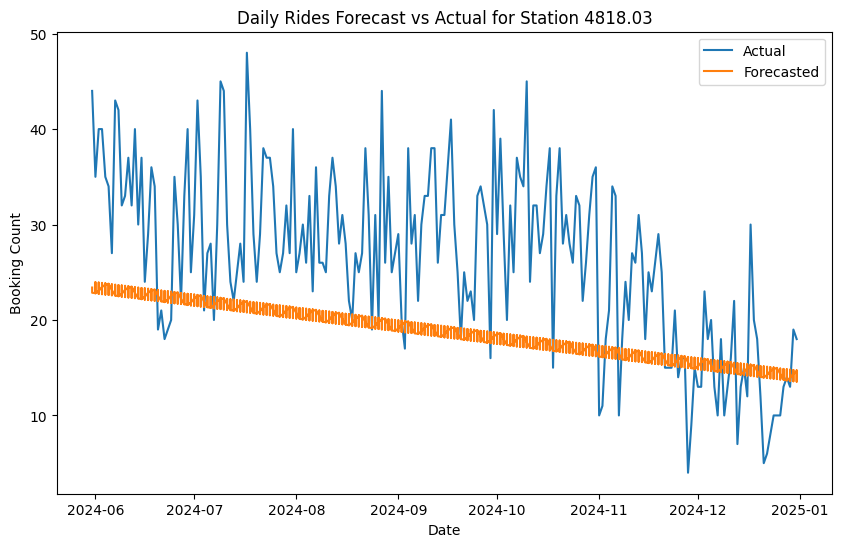

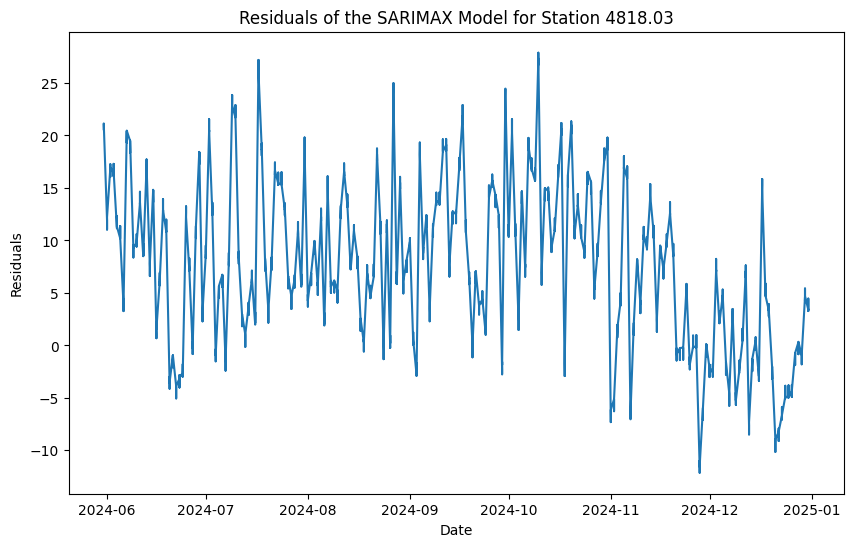

In [ ]:
# Forecasting (Ensure correct index alignment)
forecast = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, dynamic=False)

# Align forecast length with y_test length by matching index
forecast = forecast[:len(y_test)]

# Ensure forecast is aligned with y_test index
forecast.index = y_test.index

# Evaluation Metrics
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, forecast)

print(f"Evaluation Metrics for Station {station_id}:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecasted')
plt.legend()
plt.title(f"Daily Rides Forecast vs Actual for Station {station_id}")
plt.xlabel('Date')
plt.ylabel('Booking Count')
plt.show()

# Plotting residuals
residuals = y_test - forecast
plt.figure(figsize=(10,6))
plt.plot(y_test.index, residuals)
plt.title(f"Residuals of the SARIMAX Model for Station {station_id}")
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


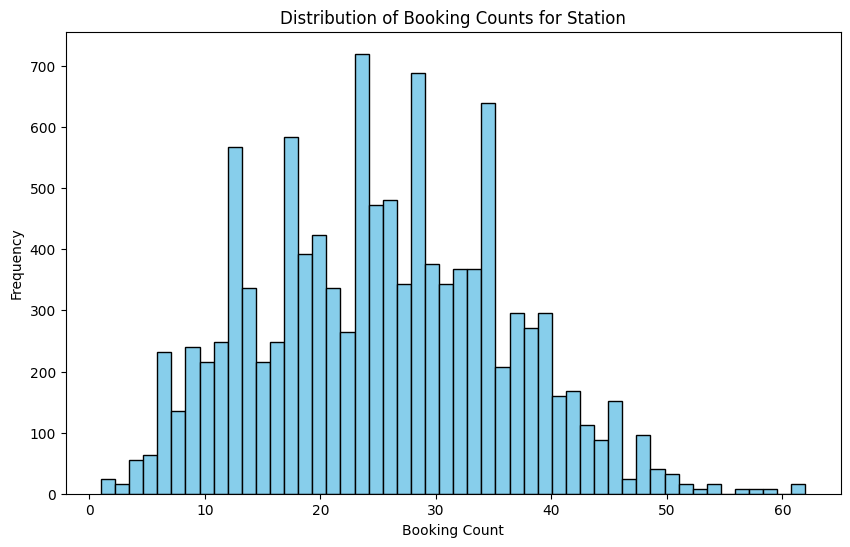

Basic Statistics for Booking Counts:
Mean Booking Count: 25.361344537815125
Standard Deviation: 10.649421102140908
Min Booking Count: 1
Max Booking Count: 62

Evaluation Metrics as a percentage of Mean Booking Count:
Mean Absolute Error (MAE) as % of Mean Booking Count: 35.79%
Root Mean Squared Error (RMSE) as % of Mean Booking Count: 43.61%
Mean Absolute Percentage Error (MAPE): 33.71%

Number of potential outliers: 40
Outliers detected: 
           start_station_id  booking_count
date                                      
2021-09-02          4818.03             59
2021-09-02          4818.03             59
2021-09-02          4818.03             59
2021-09-02          4818.03             59
2021-09-02          4818.03             59
2021-09-02          4818.03             59
2021-09-02          4818.03             59
2021-09-02          4818.03             59
2022-06-06          4818.03             56
2022-06-06          4818.03             56
2022-06-06          4818.03             

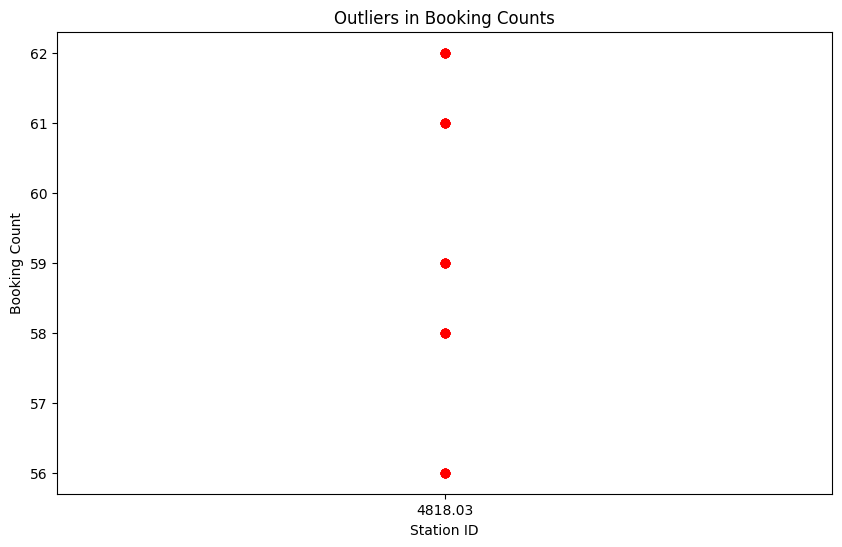


Conclusion:
The model might need improvement, as errors are above 20% of the mean booking count.
Potential outliers detected, which may have contributed to the model's error. Consider handling these outliers in preprocessing.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Plot the Distribution of Booking Counts
plt.figure(figsize=(10,6))
plt.hist(station_data['booking_count'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Booking Counts for Station")
plt.xlabel('Booking Count')
plt.ylabel('Frequency')
plt.show()

# 2. Compute Basic Statistics of the Booking Counts
mean_booking = station_data['booking_count'].mean()
std_booking = station_data['booking_count'].std()
min_booking = station_data['booking_count'].min()
max_booking = station_data['booking_count'].max()

print(f"Basic Statistics for Booking Counts:")
print(f"Mean Booking Count: {mean_booking}")
print(f"Standard Deviation: {std_booking}")
print(f"Min Booking Count: {min_booking}")
print(f"Max Booking Count: {max_booking}")

# 3. Compare Model Errors with Booking Data Characteristics
mae_percentage = (mae / mean_booking) * 100  # MAE as a percentage of the mean booking count
rmse_percentage = (rmse / mean_booking) * 100  # RMSE as a percentage of the mean booking count
mape_percentage = mape * 100  # MAPE as a percentage

print(f"\nEvaluation Metrics as a percentage of Mean Booking Count:")
print(f"Mean Absolute Error (MAE) as % of Mean Booking Count: {mae_percentage:.2f}%")
print(f"Root Mean Squared Error (RMSE) as % of Mean Booking Count: {rmse_percentage:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape_percentage:.2f}%")

# 4. Identify Potential Outliers (Extreme Booking Counts)
# This is one way to identify outliers (those beyond 1.5 * IQR)
Q1 = station_data['booking_count'].quantile(0.25)
Q3 = station_data['booking_count'].quantile(0.75)
IQR = Q3 - Q1
outliers = station_data[(station_data['booking_count'] < (Q1 - 1.5 * IQR)) |
                        (station_data['booking_count'] > (Q3 + 1.5 * IQR))]

print(f"\nNumber of potential outliers: {len(outliers)}")
if len(outliers) > 0:
    print(f"Outliers detected: \n{outliers[['start_station_id', 'booking_count']]}")

# Optional: Plot the outliers (if any)
if len(outliers) > 0:
    plt.figure(figsize=(10,6))
    plt.scatter(outliers['start_station_id'], outliers['booking_count'], color='red')
    plt.title("Outliers in Booking Counts")
    plt.xlabel('Station ID')
    plt.ylabel('Booking Count')
    plt.show()

# Conclusion:
print("\nConclusion:")
if mae_percentage < 10:
    print("The model performs well with errors less than 10% of the mean booking count.")
elif mae_percentage < 20:
    print("The model has acceptable performance with errors between 10% and 20% of the mean booking count.")
else:
    print("The model might need improvement, as errors are above 20% of the mean booking count.")

if len(outliers) > 0:
    print("Potential outliers detected, which may have contributed to the model's error. Consider handling these outliers in preprocessing.")
else:
    print("No significant outliers detected in the data.")


SARIMAX Training:   0%|                                                       | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Evaluation Metrics for Station 4818.03:
Mean Absolute Error (MAE): 7.303520106874543
Mean Squared Error (MSE): 81.60351471255443
Root Mean Squared Error (RMSE): 9.033466373023947
Mean Absolute Percentage Error (MAPE): 0.42194516662273657


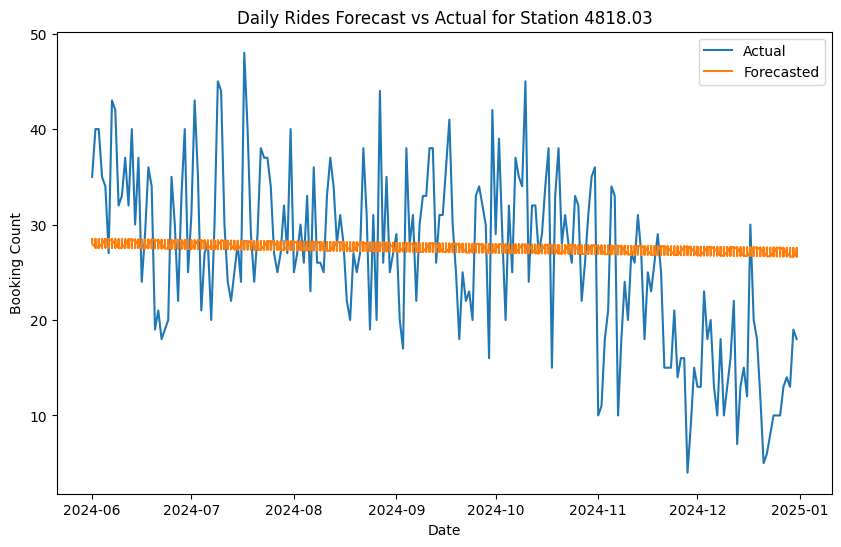

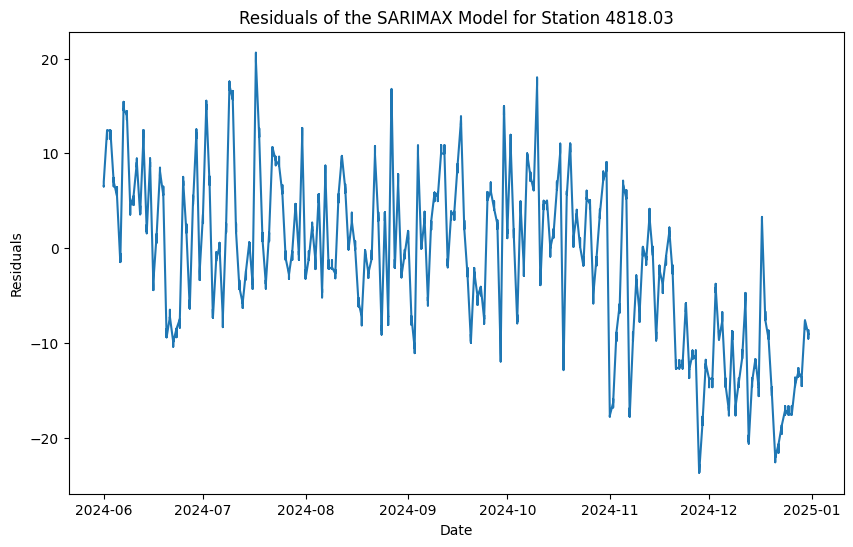

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm  # For progress bars in Colab

# Enable TQDM progress bar globally for Pandas
tqdm.pandas()

# Load the dataset (Assuming you've already preprocessed the data)
rides_2021 = pd.read_parquet("/content/cpz_station_timeseries_2021_yearly_15min.parquet")
rides_2022 = pd.read_parquet("/content/cpz_station_timeseries_2022_yearly_15min.parquet")
rides_2023 = pd.read_parquet("/content/cpz_station_timeseries_2023_yearly_15min.parquet")
rides_2024 = pd.read_parquet("/content/cpz_station_timeseries_2024_yearly_15min.parquet")

# Combine the data for all years
rides_data = pd.concat([rides_2021, rides_2022, rides_2023, rides_2024], ignore_index=True)

# Convert 'time_bucket' to datetime
rides_data['time_bucket'] = pd.to_datetime(rides_data['time_bucket'])

# Aggregate the data to daily booking counts
rides_data['date'] = rides_data['time_bucket'].dt.date
daily_rides = rides_data.groupby(['start_station_id', 'date'])['booking_count'].sum().reset_index()

# Merge with the urban features dataset for the stations
urban_features = pd.read_csv("/content/commercial,Retail.csv")
urban_features = urban_features[['station_id', 'Supermarkets and Convenience Stores_500m',
                                 'Malls and Shopping Centers_500m', 'Restaurants, Cafes, and Bars_500m',
                                 'Retail Stores_500m']]
stations_coordinates = pd.read_csv("/content/manhattan_stations_ Coordinates.csv")
stations_coordinates = stations_coordinates[['start_station_id', 'start_lat', 'start_lng']]
public_retail = pd.read_csv("/content/public,retail spaces.csv")
public_retail = public_retail[['station_id', 'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]

# Merge the data on station_id
merged_data = daily_rides.merge(urban_features, left_on='start_station_id', right_on='station_id', how='left')
merged_data = merged_data.merge(stations_coordinates, left_on='start_station_id', right_on='start_station_id', how='left')
merged_data = merged_data.merge(public_retail, left_on='start_station_id', right_on='station_id', how='left')

# Set the 'date' as index
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.set_index('date', inplace=True)

# Select a single station (example: '4818.03')
station_id = '4818.03'  # Change this to your desired station ID
station_data = merged_data[merged_data['start_station_id'] == station_id]

# Remove outliers using the IQR method
Q1 = station_data['booking_count'].quantile(0.25)
Q3 = station_data['booking_count'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
station_data_clean = station_data[(station_data['booking_count'] >= (Q1 - 1.5 * IQR)) &
                                  (station_data['booking_count'] <= (Q3 + 1.5 * IQR))]

# Split the cleaned data into train (70%), validation (15%), and test (15%)
train_data, temp_data = train_test_split(station_data_clean, test_size=0.3, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

X_train = train_data[['Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m',
                      'Restaurants, Cafes, and Bars_500m', 'Retail Stores_500m', 'start_lat', 'start_lng',
                      'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]
X_val = val_data[['Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m',
                  'Restaurants, Cafes, and Bars_500m', 'Retail Stores_500m', 'start_lat', 'start_lng',
                  'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]
X_test = test_data[['Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m',
                    'Restaurants, Cafes, and Bars_500m', 'Retail Stores_500m', 'start_lat', 'start_lng',
                    'Parks_500m', 'Libraries_500m', 'Colleges_500m', 'Attractions_500m', 'Athletics_500m']]

y_train = train_data['booking_count']
y_val = val_data['booking_count']
y_test = test_data['booking_count']

# SARIMAX Model with TQDM progress bar during fitting
with tqdm(total=1, desc="SARIMAX Training", ncols=100, position=0, leave=True) as pbar:
    model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,7), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    pbar.update(1)

# Forecasting (Ensure correct index alignment)
forecast = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, dynamic=False)

# Align forecast length with y_test length by matching index
forecast = forecast[:len(y_test)]

# Ensure forecast is aligned with y_test index
forecast.index = y_test.index

# Evaluation Metrics
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, forecast)

print(f"Evaluation Metrics for Station {station_id}:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecasted')
plt.legend()
plt.title(f"Daily Rides Forecast vs Actual for Station {station_id}")
plt.xlabel('Date')
plt.ylabel('Booking Count')
plt.show()

# Plotting residuals
residuals = y_test - forecast
plt.figure(figsize=(10,6))
plt.plot(y_test.index, residuals)
plt.title(f"Residuals of the SARIMAX Model for Station {station_id}")
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()
